# Setup
First things first, we need to set up the notebook for our exercise today.

In [80]:
import matplotlib.pyplot as plt
import numpy as np
import os


!git clone https://github.com/hamidatb/NeuroTune.git

# Constants / Global Settings
SampleRate = 256 # Amount of samples the muse records per second
plt.rcParams["figure.figsize"] = [30.00, 5.00] # Makes the plots a little wider

Cloning into 'NeuroTune'...
remote: Enumerating objects: 35083, done.
remote: Counting objects: 100% (30/30), done.
remote: Compressing objects: 100% (24/24), done.
remote: Total 35083 (delta 10), reused 24 (delta 6), pack-reused 35053 (from 1)
Receiving objects: 100% (35083/35083), 785.96 MiB | 23.14 MiB/s, done.
Resolving deltas: 100% (5945/5945), done.
Updating files: 100% (887/887), done.


# Step 1:
Open and Format

In [81]:
channel = []
filename = "NeuroTune/emotions_dataset/Happy/Brainwaves_Happy_1.csv"



with open(filename, "r") as data:
    for line in data:
        line = line.split(",")
        channel.append(float(line[1]))

<details>
  <summary>Solution</summary>

  ```
  channel = []
  filename = "/content/eo.csv"

  with open(filename, "r") as data:
      for line in data:
          line = line.split(",")
          channel.append(float(line[1]))
  ```
</details>

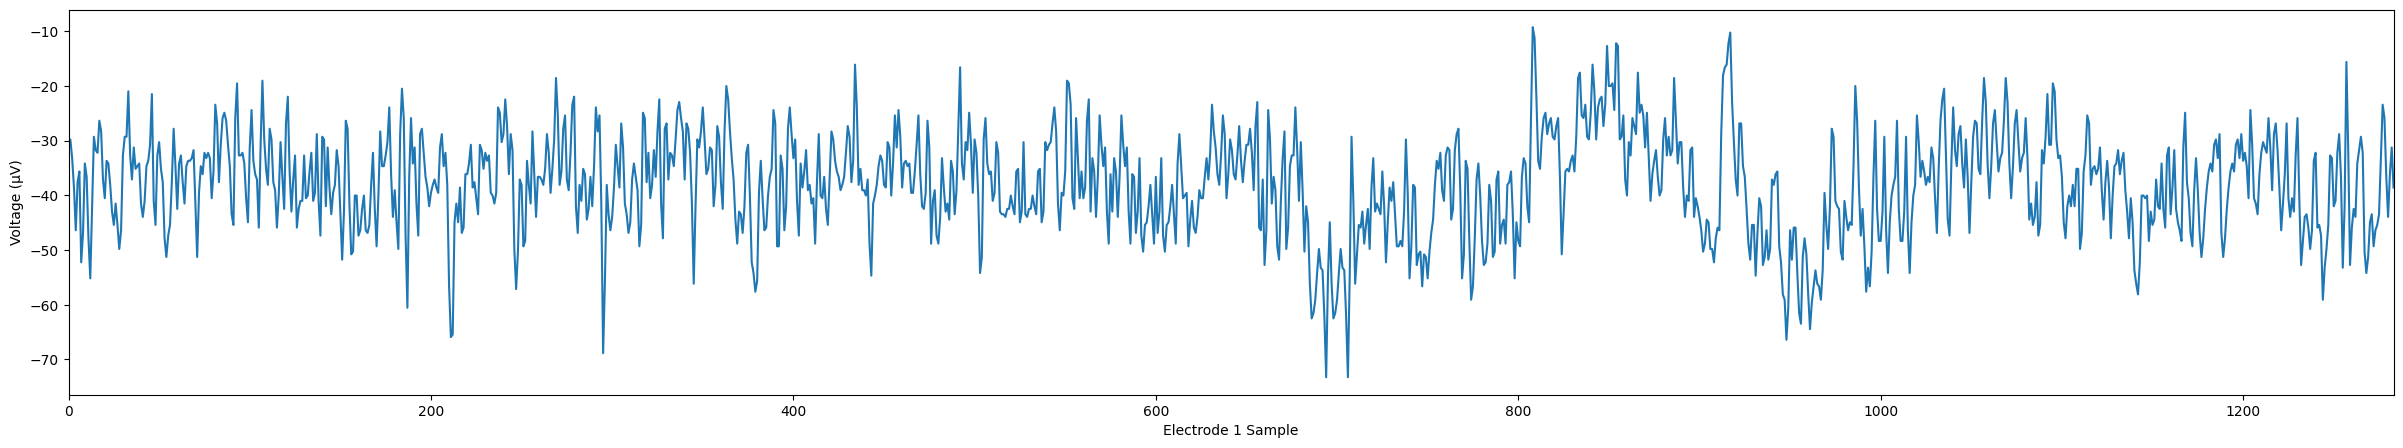

In [4]:
# Show a plot of the raw brainwave
time = np.arange(0, len(channel), 1)

plt.plot(time, channel)
plt.xlabel("Electrode 1 Sample")
plt.ylabel("Voltage (μV)")
plt.margins(x=0)
plt.show()

# Step 2:
Fast Fourier Transform

In [5]:
# Fourier transform
fftData = np.fft.fft(channel)
freq = np.fft.fftfreq(len(channel)) * SampleRate

# Now we just plot the transformed data (the exact same wave but in the frequency domain)
plotFreq    = freq[1:int(len(freq)/2)]                  # Remove negative reflection
plotFftData = fftData[1:int(len(fftData)/2)]            # Remove negative reflection
plotMag     = plotFftData.real**2 + plotFftData.imag**2 # FFT is a complex function, so we need to cast to the real domain

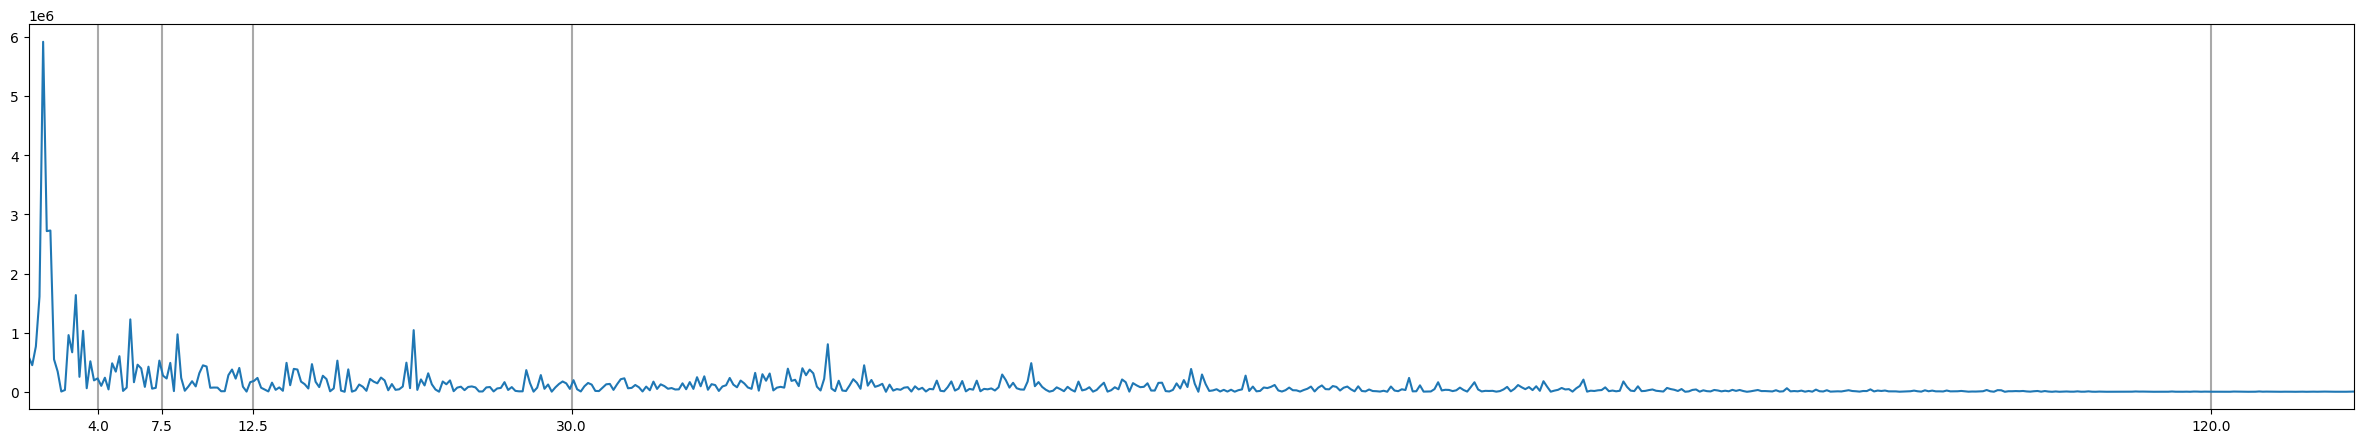

In [6]:
isShowingBinLines = True

# Create the plot
fig = plt.figure()
ax = fig.add_subplot()

# Add the special spacing
if(isShowingBinLines):
  subsets=[0, 4, 7.5, 12.5, 30, 120]
  ax.set_xticks(subsets)

# Add the vertical lines
if(isShowingBinLines):
  plt.axvline(x=4, color="darkgrey")
  plt.axvline(x=7.5, color="darkgrey")
  plt.axvline(x=12.5, color="darkgrey")
  plt.axvline(x=30, color="darkgrey")
  plt.axvline(x=120, color="darkgrey")

# Plot
ax.margins(x=0)
ax.plot(plotFreq, plotMag)
plt.show()

#Step 3:
Power Bins

In [7]:
# Bin the results
binsAverage = [0,0,0,0,0] # We will append to this later
binsTotal   = [0,0,0,0,0]
binsCount   = [0,0,0,0,0]

for point in range(len(plotFreq)):
  frequency = plotFreq[point]

  if(frequency < 4):      # Delta (0 - 4Hz)
    binsTotal[0] += plotMag[point]
    binsCount[0] += 1

  elif(frequency < 7.5):  # Theta (4 - 7.5Hz)
    binsTotal[1] += plotMag[point]
    binsCount[1] += 1

  elif(frequency < 12.5): # Alpha (7.5 - 12.5Hz)
    binsTotal[2] += plotMag[point]
    binsCount[2] += 1

  elif(frequency < 30):   # Beta  (12.5 - 30Hz)
    binsTotal[3] += plotMag[point]
    binsCount[3] += 1

  elif(frequency < 120):   # Gamma (30 - 120Hz)
    binsTotal[4] += plotMag[point]
    binsCount[4] += 1

# Compute the average for all of them
binsAverage = list(np.array(binsTotal)/np.array(binsCount))

print("Total:  ", binsTotal)
print("Count:  ", binsCount)
print("Average:", binsAverage)

Total:   [21246761.860118277, 5280566.181029631, 5535572.270117754, 11817974.303478997, 26478545.891842272]
Count:   [20, 17, 25, 88, 451]
Average: [1062338.0930059138, 310621.5400605665, 221422.89080471016, 134295.16253953407, 58710.744771268895]


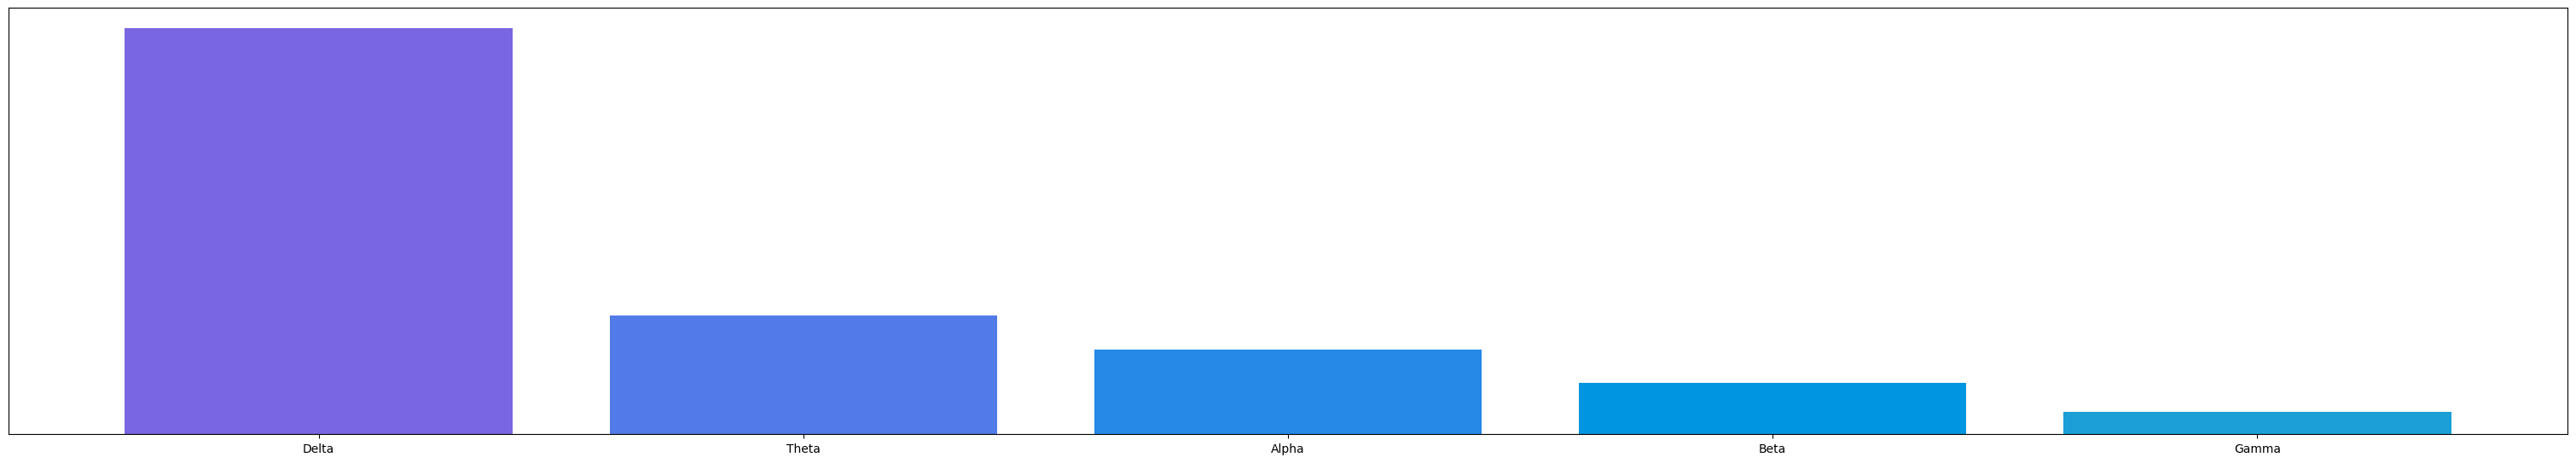

In [ ]:
# Create the plot
fig = plt.figure()

# Hide the y axis
ax = fig.add_axes([0,0,1,1])
ax.get_yaxis().set_visible(False)

# Plot
binNames = ['Delta', 'Theta', 'Alpha', 'Beta', 'Gamma']
ax.bar(binNames, binsAverage, color=['#7967e1', '#527ae8', '#2689e7', '#0095e0', '#1b9fd6'])
plt.show()

#Step 3.5
Here we are going to move all of what we've written above into a function that we can use to easily run everything on our data later!

In [35]:
def getPowerBinsFromFilename(filename):
  if(str(type(filename)) != "<class 'str'>"): # Error handling
    print("Error: filename must be a string.")
    return


  ## Open the data ##
  channel = []
  with open(filename, "r") as data:
    for line in data:
        line = line.split(",")
        channel.append(float(line[1]))


  ## Fourier transform the data ##
  fftData = np.fft.fft(channel)
  freq = np.fft.fftfreq(len(channel)) * SampleRate

  outFftData = fftData[1:int(len(fftData)/2)]
  outMag     = outFftData.real**2 + outFftData.imag**2
  outFreq    = freq[1:int(len(freq)/2)]


  ## Bin the data ##
  binsTotal   = [0,0,0,0,0]
  binsCount   = [0,0,0,0,0]

  for point in range(len(outFreq)):
    frequency = outFreq[point]

    if(frequency < 4):      # Delta (0 - 4Hz)
      binsTotal[0] += outMag[point]
      binsCount[0] += 1

    elif(frequency < 7.5):  # Theta (4 - 7.5Hz)
      binsTotal[1] += outMag[point]
      binsCount[1] += 1

    elif(frequency < 12.5): # Alpha (7.5 - 12.5Hz)
      binsTotal[2] += outMag[point]
      binsCount[2] += 1

    elif(frequency < 30):   # Beta  (12.5 - 30Hz)
      binsTotal[3] += outMag[point]
      binsCount[3] += 1

    elif(frequency < 120):   # Gamma (30 - 120Hz)
      binsTotal[4] += outMag[point]
      binsCount[4] += 1

    binsAverage = [total / count if count != 0 else 0 for total, count in zip(binsTotal, binsCount)]

  ## Finished computing the bins, return them ##
  return binsAverage



'''
def showPlot(values, title):
    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])
    plt.title(title, loc='left')
    ax.get_yaxis().set_visible(False)

    binNames = ['Delta', 'Theta', 'Alpha', 'Beta', 'Gamma']
    ax.bar(binNames, values, color=['#7967e1', '#527ae8', '#2689e7', '#0095e0', '#1b9fd6'])
    plt.show()




def showComparisonPlot(values):
    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])
    plt.title("Comparison", loc='left')
    ax.get_yaxis().set_visible(False)

    binNames = ['Sample A', 'Sample B']
    ax.bar(binNames, values, color=['#7967e1', '#1b9fd6'])
    plt.show()
'''

'\ndef showPlot(values, title):\n    fig = plt.figure()\n    ax = fig.add_axes([0,0,1,1])\n    plt.title(title, loc=\'left\')\n    ax.get_yaxis().set_visible(False)\n\n    binNames = [\'Delta\', \'Theta\', \'Alpha\', \'Beta\', \'Gamma\']\n    ax.bar(binNames, values, color=[\'#7967e1\', \'#527ae8\', \'#2689e7\', \'#0095e0\', \'#1b9fd6\'])\n    plt.show()\n\n\n\n\ndef showComparisonPlot(values):\n    fig = plt.figure()\n    ax = fig.add_axes([0,0,1,1])\n    plt.title("Comparison", loc=\'left\')\n    ax.get_yaxis().set_visible(False)\n\n    binNames = [\'Sample A\', \'Sample B\']\n    ax.bar(binNames, values, color=[\'#7967e1\', \'#1b9fd6\'])\n    plt.show()\n'

#Step 4:
Classify!

# PREPROCESSING!!!!!!!!!!!!!!!!!!!!

In [86]:
import pandas as pd

def wave_to_df(bin, mood):
  wave_data = {
    "Delta" : bin[0],
    "Theta" : bin[1],
    "Alpha" : bin[2],
    "Beta" :  bin[3],
    "Gamma" : bin[4],
    "Mood" : mood
  }
  df = pd.DataFrame.from_dict([wave_data])
  return df
def append_to_df(df, bin, mood):
  wave_data = {
    "Delta" : bin[0],
    "Theta" : bin[1],
    "Alpha" : bin[2],
    "Beta" :  bin[3],
    "Gamma" : bin[4],
    "Mood" : mood
  }
  df_new = pd.DataFrame.from_dict([wave_data])
  frames = [df, df_new]
  df = pd.concat(frames)
  df = df.reset_index(drop=True)
  return df


def process_folder(folder_path, mood):
    # Initialize an empty DataFrame
    df = pd.DataFrame(columns=["Delta", "Theta", "Alpha", "Beta", "Gamma", "Mood"])

    # Loop through each file in the folder
    for file_name in os.listdir(folder_path):
        if file_name.endswith(".csv"):  # Ensure only CSV files are processed
            file_path = os.path.join(folder_path, file_name)
            bins = getPowerBinsFromFilename(file_path)
            if df.empty:
                df = wave_to_df(bins, mood)
            else:
                df = append_to_df(df, bins, mood)

    return df


# Path to the folder
folder_path_happy = "NeuroTune/emotions_dataset/Happy"
folder_path_sad = "NeuroTune/emotions_dataset/Sad"
folder_path_angry = "NeuroTune/emotions_dataset/Angry"
folder_path_relaxed = "NeuroTune/emotions_dataset/Relaxed"

# Initialize an empty master DataFrame
master_df = pd.DataFrame(columns=["Delta", "Theta", "Alpha", "Beta", "Gamma", "Mood"])

# Process each folder and append results to the master DataFrame

for folder_path, mood in [
    (folder_path_happy, "Happy"),
    (folder_path_sad, "Sad"),
    (folder_path_angry, "Angry"),
    (folder_path_relaxed, "Relaxed"),
]:
    folder_df = process_folder(folder_path, mood)
    master_df = pd.concat([master_df, folder_df], ignore_index=True)

# Display the resulting DataFrame
print(master_df)




<ipython-input-86-4f8b174f083b>:65: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  master_df = pd.concat([master_df, folder_df], ignore_index=True)


           Delta         Theta         Alpha          Beta         Gamma  \
0   4.345471e+05  1.236701e+05  1.127263e+05  6.820599e+04  3.501737e+04   
1   1.802376e+09  4.356478e+09  7.573240e+09  2.682883e+09  2.760122e+08   
2   1.788298e+09  3.658885e+09  8.030243e+09  2.819433e+09  2.709374e+08   
3   9.276496e+05  4.976492e+05  3.710803e+05  8.049964e+05  8.051961e+04   
4   1.350392e+09  2.992033e+09  9.487467e+09  2.602161e+09  2.749572e+08   
5   1.192564e+09  2.296027e+09  1.180780e+10  2.107243e+09  2.669219e+08   
6   1.858106e+06  3.935786e+05  1.726914e+05  1.113870e+05  5.746538e+04   
7   1.518889e+09  2.647388e+09  8.417230e+09  2.947980e+09  2.726779e+08   
8   1.062338e+06  3.106215e+05  2.214229e+05  1.342952e+05  5.871074e+04   
9   2.064514e+09  3.057568e+09  7.419138e+09  2.380720e+09  3.558609e+08   
10  1.408489e+09  3.541564e+09  7.861407e+09  2.236630e+09  3.436866e+08   
11  1.338810e+06  6.565454e+05  4.747917e+05  1.067841e+06  1.098430e+05   
12  1.305875

# KAN!!!!!!!!!!!!!

In [28]:
!pip install pykan

In [43]:
import pandas as pd
import torch
from sklearn.model_selection import train_test_split
from kan import *
from kan.utils import create_dataset
from kan.utils import ex_round
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [83]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import torch

# Encode labels
label_encoder = LabelEncoder()
master_df['Mood'] = label_encoder.fit_transform(master_df['Mood'])

# Convert features and labels to NumPy arrays
X = master_df[['Delta', 'Theta', 'Alpha', 'Beta', 'Gamma']].values
y = master_df['Mood'].values

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features using training data statistics
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Fit on training data and transform
X_test_scaled = scaler.transform(X_test)       # Transform test data using the same scaler

# Convert scaled data to PyTorch tensors
X_train = torch.tensor(X_train_scaled, dtype=torch.float32)
X_test = torch.tensor(X_test_scaled, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.long)
y_test = torch.tensor(y_test, dtype=torch.long)

# Package data into a dataset dictionary
dataset = {
    'train_input': X_train,
    'train_label': y_train,
    'test_input': X_test,
    'test_label': y_test
}

# Model Initialization
#torch.manual_seed(42)  # For reproducibility
model = KAN(width=[5, 16, 8, 4], grid=3, k=3, seed=42, device=device)

# Train the model with CrossEntropyLoss
model.fit(dataset, opt="Adam", steps=100, loss_fn=torch.nn.CrossEntropyLoss())


checkpoint directory created: ./model
saving model version 0.0


| train_loss: 9.00e+00 | test_loss: 1.75e+01 | reg: 2.96e+04 | : 100%|█| 100/100 [00:05<00:00, 17.01


saving model version 0.1


{'train_loss': [array(1.1781881, dtype=float32),
  array(4.3427453, dtype=float32),
  array(5.150817, dtype=float32),
  array(13.328681, dtype=float32),
  array(6.893621, dtype=float32),
  array(4.661792, dtype=float32),
  array(1.6907288, dtype=float32),
  array(4.3387237, dtype=float32),
  array(4.841861, dtype=float32),
  array(2.4091737, dtype=float32),
  array(2.743365, dtype=float32),
  array(6.6143527, dtype=float32),
  array(6.123336, dtype=float32),
  array(79.603935, dtype=float32),
  array(60.065216, dtype=float32),
  array(1.1612061, dtype=float32),
  array(218.38857, dtype=float32),
  array(27.182623, dtype=float32),
  array(35.184093, dtype=float32),
  array(309.96057, dtype=float32),
  array(21.070164, dtype=float32),
  array(12.241294, dtype=float32),
  array(8.405038, dtype=float32),
  array(1.0365222, dtype=float32),
  array(1.0365222, dtype=float32),
  array(18.532543, dtype=float32),
  array(10780.636, dtype=float32),
  array(187.7927, dtype=float32),
  array(195.55

In [84]:
#train model with CrossEntropyLoss for classification (epoch 1)
# "Adam optimization is a stochastic gradient descent method that is based on adaptive estimation of first-order and second-order moments"
model.fit(dataset, opt="Adam", steps=200, loss_fn=torch.nn.CrossEntropyLoss())
model.fit(dataset, opt="Adam", steps=200, loss_fn=torch.nn.CrossEntropyLoss())
model.fit(dataset, opt="Adam", steps=200, loss_fn=torch.nn.CrossEntropyLoss())
model.fit(dataset, opt="Adam", steps=200, loss_fn=torch.nn.CrossEntropyLoss())
model.fit(dataset, opt="Adam", steps=200, loss_fn=torch.nn.CrossEntropyLoss())


#accuracy calculations
def train_acc():
    predictions = torch.argmax(model(dataset['train_input']), dim=1)
    return torch.mean((predictions == dataset['train_label']).float())

def test_acc():
    predictions = torch.argmax(model(dataset['test_input']), dim=1)
    return torch.mean((predictions == dataset['test_label']).float())

| train_loss: 5.37e+00 | test_loss: 6.31e+00 | reg: 3.67e+04 | : 100%|█| 200/200 [00:05<00:00, 36.81


saving model version 0.2


| train_loss: 1.80e+01 | test_loss: 2.19e+01 | reg: 7.13e+04 | : 100%|█| 200/200 [00:04<00:00, 43.62


saving model version 0.3


| train_loss: 4.33e+01 | test_loss: 4.31e+01 | reg: 6.72e+05 | : 100%|█| 200/200 [00:04<00:00, 41.67


saving model version 0.4


| train_loss: 8.74e+01 | test_loss: 1.14e+02 | reg: 8.59e+06 | : 100%|█| 200/200 [00:05<00:00, 38.67


saving model version 0.5


| train_loss: 5.08e+01 | test_loss: 2.67e+04 | reg: 1.12e+07 | : 100%|█| 200/200 [00:04<00:00, 44.88


saving model version 0.6


In [85]:
#train again, calculate accuracy metrics at each step
results = model.fit(dataset, opt="Adam", steps=200, metrics=(train_acc, test_acc), loss_fn=torch.nn.CrossEntropyLoss())
print("Final Train Accuracy:", results['train_acc'][-1])
print("Final Test Accuracy:", results['test_acc'][-1])

| train_loss: 1.60e+03 | test_loss: 1.35e+03 | reg: 2.18e+07 | : 100%|█| 200/200 [00:06<00:00, 29.34

saving model version 0.7
Final Train Accuracy: 0.42500001192092896
Final Test Accuracy: 0.4000000059604645


In [76]:
new_instance = 'Brainwaves_Happy_20.csv'

# Process the new instance to get bins
bin_avg = getPowerBinsFromFilename(new_instance)
print("Bin Averages:", bin_avg)

# Convert to tensor and add a batch dimension
bin_avg_scaled = scaler.transform([bin_avg])  # Transform expects 2D input
new_instance_tensor = torch.tensor(bin_avg_scaled, dtype=torch.float32).to(device)

# Pass the scaled instance through the model
logits = model(new_instance_tensor)

# Get the predicted class index
predicted_class_idx = torch.argmax(logits, dim=1).item()

# Decode the predicted index back to the emotion label
predicted_emotion = label_encoder.inverse_transform([predicted_class_idx])[0]

if predicted_emotion == 0:
  print("Predicted Emotion: Happy")
elif predicted_emotion == 1:
  print("Predicted Emotion: Sad")
elif predicted_emotion == 2:
  print("Predicted Emotion: Angry")
elif predicted_emotion == 3:
  print("Predicted Emotion: Relaxed")


Bin Averages: [1305874651.5729103, 4112871651.6032734, 9627126733.639824, 2276395863.709807, 285528844.2273324]
Predicted Emotion: Relaxed


/usr/local/lib/python3.10/dist-packages/kan/MultKAN.py:813: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at ../aten/src/ATen/native/ReduceOps.cpp:1823.)
  self.subnode_actscale.append(torch.std(x, dim=0).detach())
/usr/local/lib/python3.10/dist-packages/kan/MultKAN.py:823: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at ../aten/src/ATen/native/ReduceOps.cpp:1823.)
  input_range = torch.std(preacts, dim=0) + 0.1
/usr/local/lib/python3.10/dist-packages/kan/MultKAN.py:824: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at ../aten/src/ATen/native/ReduceOps.cpp:1823.)
  output_range_spline = torch.std(postacts_numerical, dim

saving model version 0.4


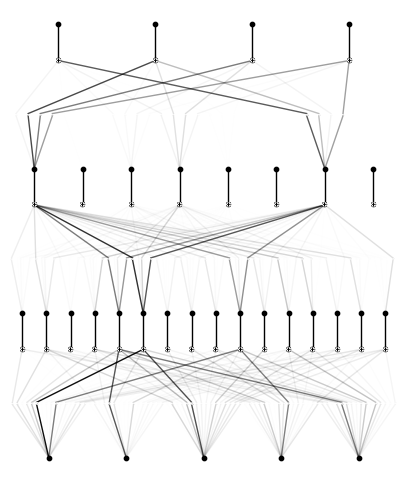

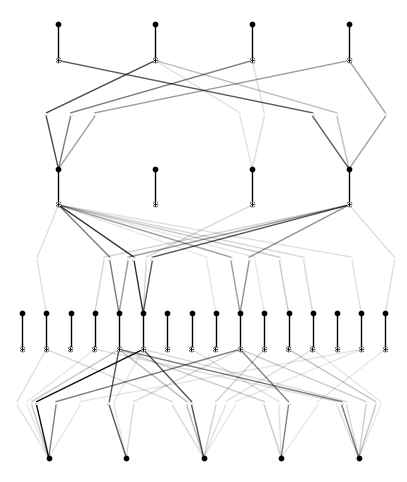

In [ ]:
 #plot model
model(dataset['train_input'])
model.plot()

#prune and plot model
model = model.prune()
model.plot()

In [ ]:
print('-' * 50)
#find best fit function
mode = 'auto'  # can also do manual
#library of potential functions the model can use
lib = ['x', 'x^2', 'x^3', 'x^4', 'exp', 'log', 'sqrt', 'tanh', 'sin', 'abs']
#for each node it calculates the correlation between the function and the output. function with highest R is chosen
model.auto_symbolic(lib=lib)

formula = model.symbolic_formula()[0][0]
ex_round(formula, 4)
print("\n Formula: ", formula)
print('-' * 50)

--------------------------------------------------
fixing (0,0,0) with 0
fixing (0,0,1) with sin, r2=0.9928972125053406, c=2
fixing (0,0,2) with 0
fixing (0,0,3) with x, r2=0.9938915371894836, c=1
fixing (0,0,4) with x, r2=0.8889276385307312, c=1
fixing (0,0,5) with x, r2=0.9652178883552551, c=1
fixing (0,0,6) with 0
fixing (0,0,7) with 0
fixing (0,0,8) with 0
fixing (0,0,9) with x, r2=0.9176141023635864, c=1
fixing (0,0,10) with 0
fixing (0,0,11) with 0
fixing (0,0,12) with 0
fixing (0,0,13) with 0
fixing (0,0,14) with sin, r2=0.9993219971656799, c=2
fixing (0,0,15) with 0
fixing (0,1,0) with 0
fixing (0,1,1) with 0
fixing (0,1,2) with 0
fixing (0,1,3) with 0
fixing (0,1,4) with x, r2=0.9253676533699036, c=1
fixing (0,1,5) with sin, r2=0.9999858140945435, c=2
fixing (0,1,6) with 0
fixing (0,1,7) with 0
fixing (0,1,8) with 0
fixing (0,1,9) with sin, r2=0.981902539730072, c=2
fixing (0,1,10) with 0
fixing (0,1,11) with 0
fixing (0,1,12) with 0
fixing (0,1,13) with 0
fixing (0,1,14) with